### Exercise 04 : Histogram
* analyze only the users and not the admins
* create two lists of values (for working days and for weekends) for the histogram
input
* the figsize is still the same, you can choose the fontsize as well as the color palette
* use a level of transparency for the histogram in front equal to 0.7

In [353]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect("../data/checking-logs.sqlite")
query = "SELECT timestamp FROM checker WHERE uid LIKE 'user_%'"
df = pd.io.sql.read_sql(query, connection, parse_dates="timestamp")
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.weekday
df["weekend"] = df["weekday"] >= 5

In [354]:
working_day = df.loc[~df["weekend"], "hour"].reset_index(drop=True)
working_day

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int32

In [355]:
weekend = df.loc[df["weekend"], "hour"].reset_index(drop=True)
weekend

0        7
1       13
2       13
3       13
4       13
        ..
1165    22
1166    22
1167    22
1168    22
1169    22
Name: hour, Length: 1170, dtype: int32

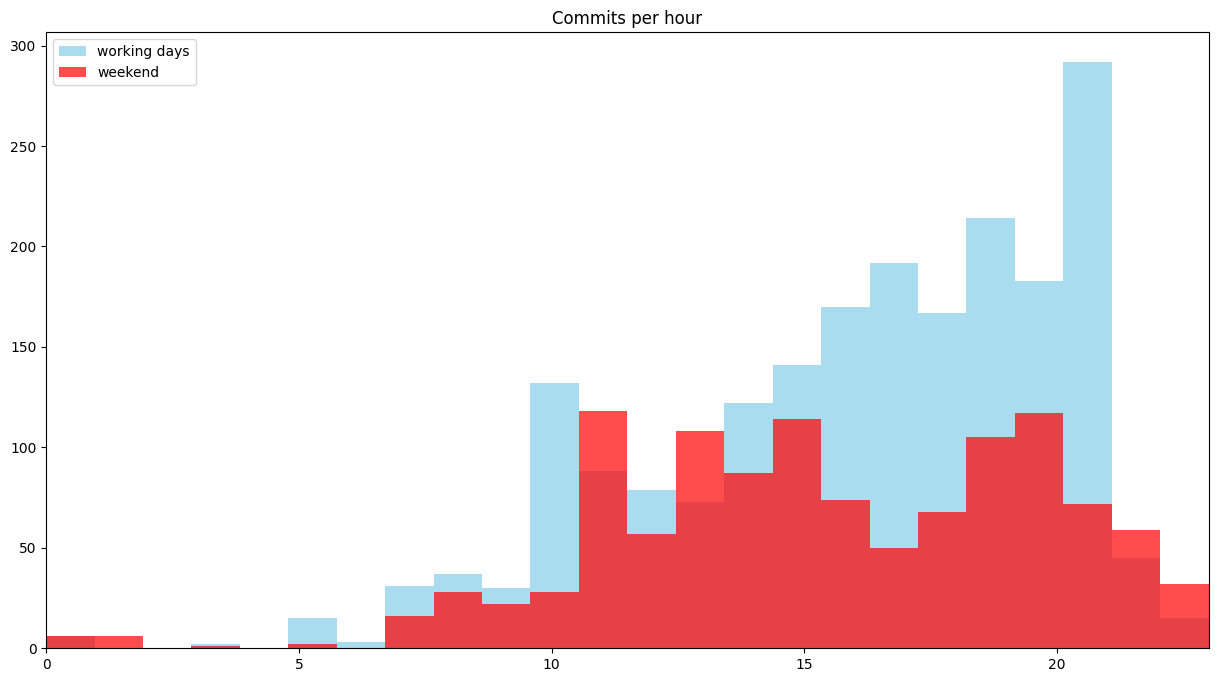

In [356]:
plt.figure(figsize=(15, 8))
plt.xlim(0, 23)
plt.hist(working_day, bins=24, alpha=0.7, color='skyblue', label='working days')
plt.hist(weekend, bins=24, alpha=0.7, color='red', label='weekend')
plt.title("Commits per hour")
plt.legend()
plt.show()

* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“Are there hours when the total number of commits was higher on weekends than
on working days?” In your answer, put the top-4 examples.

Are there hours when the total number of commits was higher on weekends than
on working days?

In [357]:
working_day = working_day.to_frame()
weekend = weekend.to_frame()
working_day_size = working_day.groupby("hour").size().reset_index(name="size_hour_wwork")
hours = weekend.groupby("hour").size().reset_index(name="size_hour_wend")
hours["size_hour_wwork"] =  working_day_size["size_hour_wwork"]
hours.sort_values("size_hour_wend", inplace=True, ascending=False)
top_hours = hours[hours["size_hour_wend"] > hours["size_hour_wwork"]]
top_hours.head(4)



,hour,size_hour_wend,size_hour_wwork
8,11,118,88
10,13,108,73
19,22,59,45
20,23,32,15


The answer: 11, 13, 22, 23

In [358]:
connection.close()